<a href="https://colab.research.google.com/github/majd1988shahin/DLM/blob/master/L04/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np



In [56]:
(x_train, y_train), (x_test, y_test) =mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


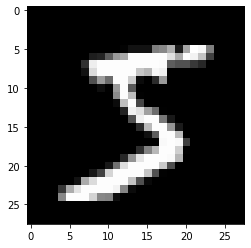

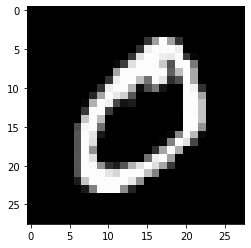

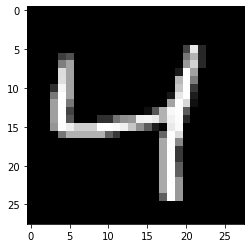

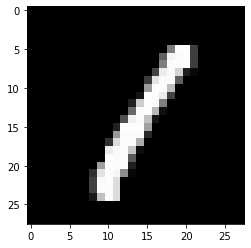

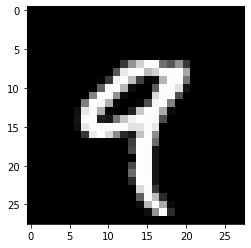

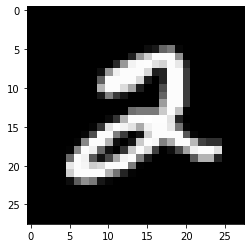

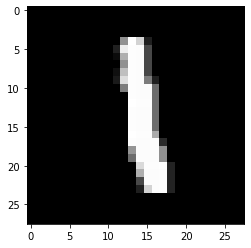

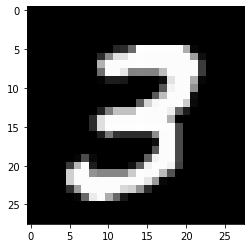

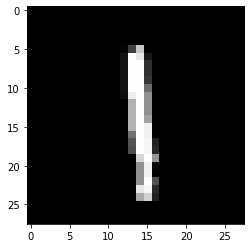

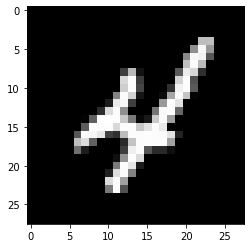

In [57]:
for i in range(0,10):
    plt.figure(i)
    plt.imshow(x_train[i],cmap='gray') 

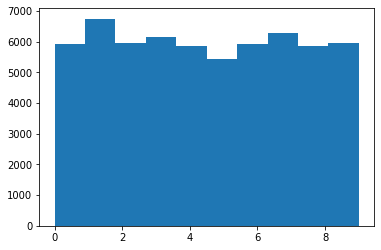

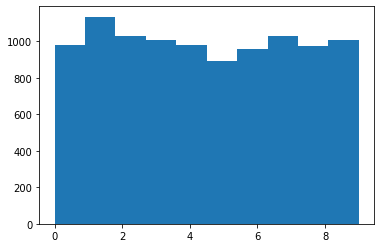

In [58]:
plt.figure(11)
y_train_hist_n=plt.hist(y_train)
plt.figure(12)
y_test_hist_n=plt.hist(y_test)


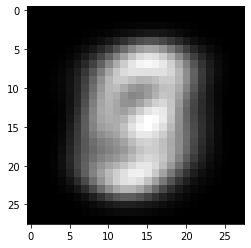

In [59]:
average_image = np.reshape(np.array([x_train[:,x,y].mean() 
    for x in range(0,28) for y in range(0,28)]),(28,28))
plt.figure(13)
plt.imshow(average_image,cmap='gray')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see th

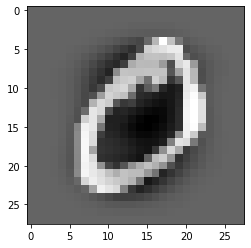

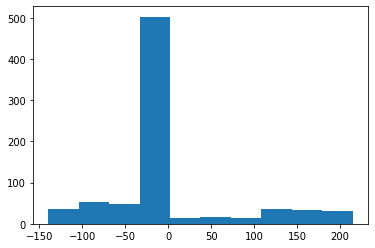

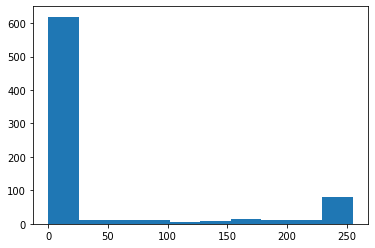

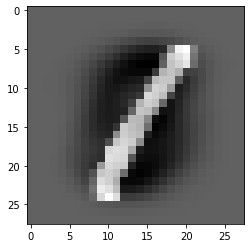

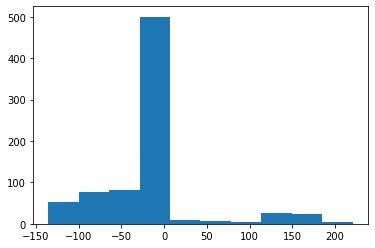

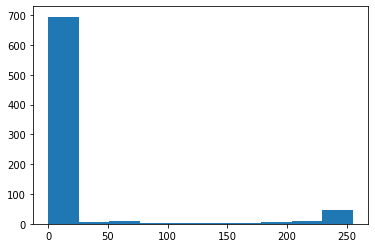

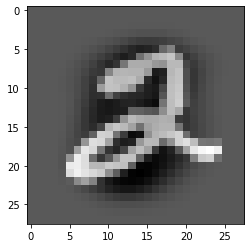

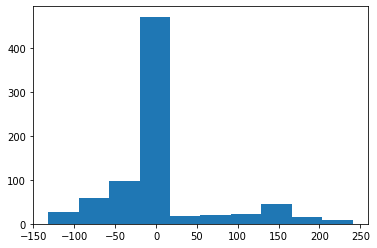

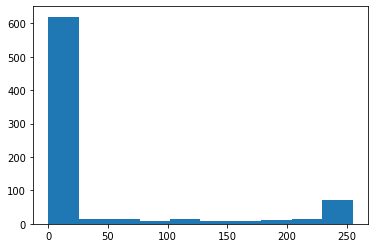

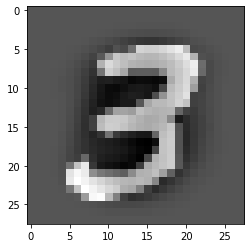

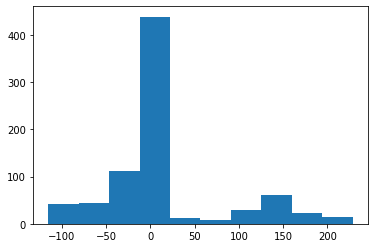

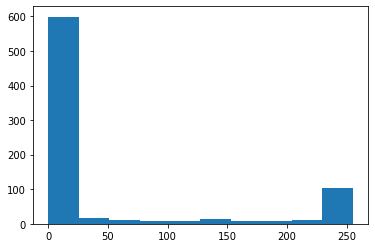

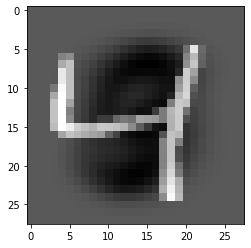

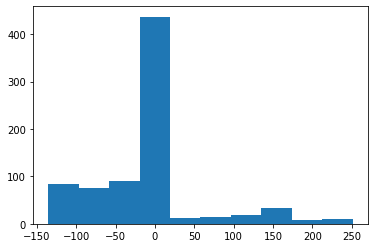

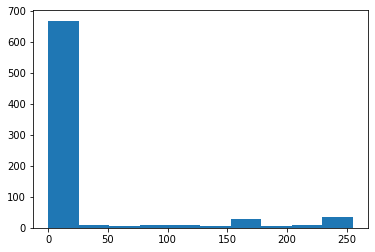

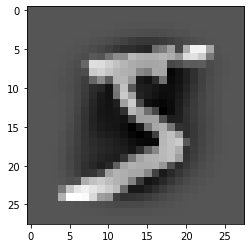

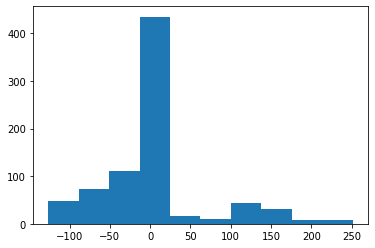

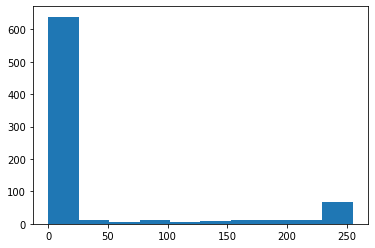

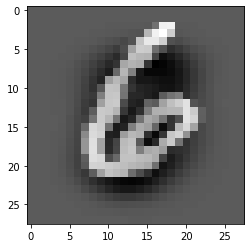

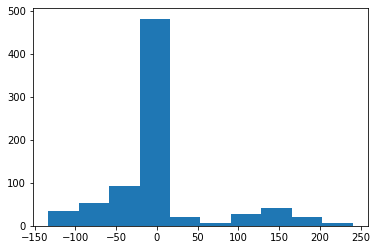

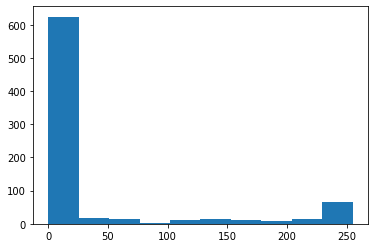

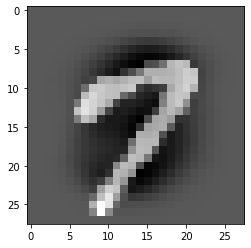

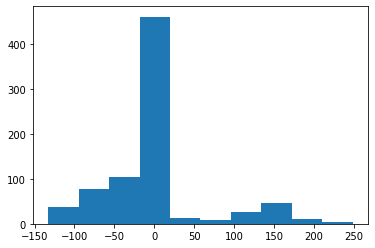

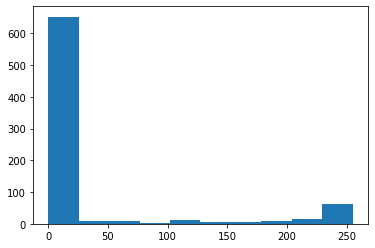

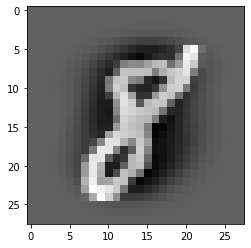

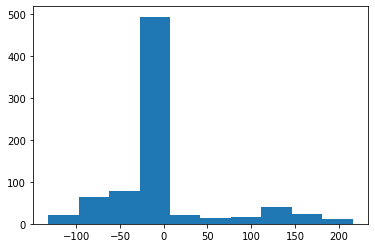

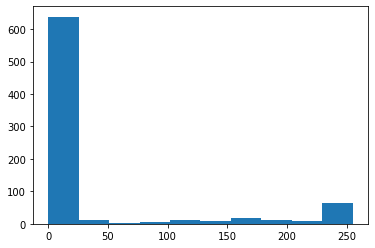

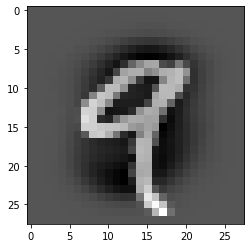

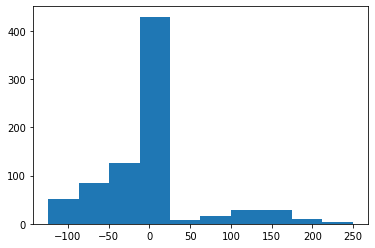

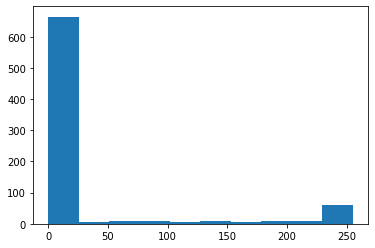

In [60]:
for i in range(0,10):
    
    img = x_train[np.where(y_train==i)[0][0] ,:,:]#erses Bilde von Klasse i ist 
    img_average = img -average_image
        
    # get some image
    plt.figure(i)
    plt.imshow(img_average,cmap="gray")

    plt.figure(i+100)
    plt.hist(img_average.flatten())
    plt.figure(i+200) 
    plt.hist(img.flatten())

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils import to_categorical
import keras.backend as K
import gc

In [62]:
flat_input_train = np.reshape(x_train,(len(x_train),-1))
flat_input_train.shape

(60000, 784)

In [0]:
flat_input_train_minus_averaged=flat_input_train-img_average.flatten()

In [0]:
flat_input_test = np.reshape(x_test,(len(x_test),-1))
flat_input_test_minus_averaged=flat_input_test-img_average.flatten()


In [0]:
from keras.layers import Input

In [0]:
def create_model():
    
    model = Sequential()
   # model.add(Input(shape=(32,)))

    model.add(Dense(32, input_dim=flat_input_train.shape[1]))
    
    model.add(Dense(64,activation="relu"))
    
    # Final layer - choose the amount of classes
    model.add(Dense(10,activation="softmax"))
    return model



In [0]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

#print(y_train_cat.shape,y_train_cat[0:5,:])

#10 + 11

optimizers_to_test : rmsprop
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 4s 59us/step - loss: 8.4386 - acc: 0.4740 - val_loss: 7.7343 - val_acc: 0.5178
Epoch 2/15
60000/60000 [==============================] - 3s 55us/step - loss: 5.9393 - acc: 0.6293 - val_loss: 5.7855 - val_acc: 0.6397
Epoch 3/15
60000/60000 [==============================] - 3s 55us/step - loss: 5.1826 - acc: 0.6764 - val_loss: 4.6925 - val_acc: 0.7063
Epoch 4/15
60000/60000 [==============================] - 3s 56us/step - loss: 4.4882 - acc: 0.7196 - val_loss: 4.5422 - val_acc: 0.7168
Epoch 5/15
60000/60000 [==============================] - 3s 55us/step - loss: 4.3420 - acc: 0.7290 - val_loss: 4.2412 - val_acc: 0.7357
Epoch 6/15
60000/60000 [==============================] - 3s 56us/step - loss: 4.3338 - acc: 0.7302 - val_loss: 4.5021 - val_acc: 0.7197
Epoch 7/15
60000/60000 [==============================] - 3s 55us/step - loss: 4.2826 - acc: 0.7332

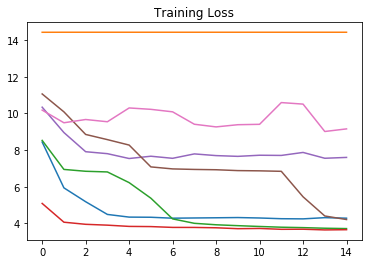

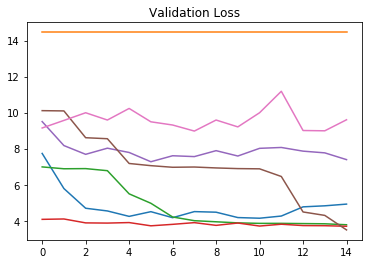

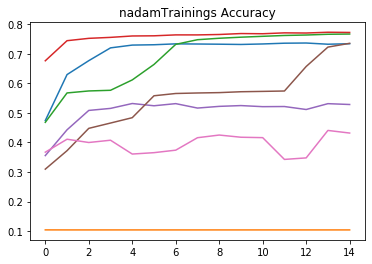

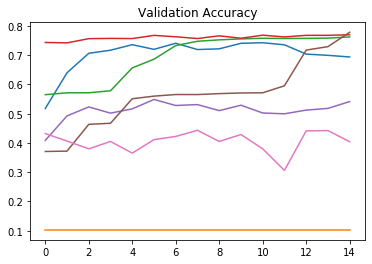

In [77]:
#from google.colab import files
#i=1000
#plt.close()
optimizers_to_test = ["rmsprop",'sgd',"adagrad","adadelta","adam","adamax","nadam"]
for optimizer in optimizers_to_test:
    print("optimizers_to_test :" ,optimizer)
    
    model = create_model()
    
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    hist = model.fit(flat_input_train,y_train_cat,validation_data=\
              (flat_input_test,y_test_cat),epochs=15)
   # i=i+1
   # plt.figure(i)
    plt.figure(999)
    plt.plot(hist.history["loss"])
    #plt.title(optimizer+"Training Loss")
    plt.title("Training Loss")
    #plt.imsave(optimizer.join("Training Loss"),hist.history["loss"])
    ##plt.savefig(optimizer+"Training_Loss.png")
    #files.download(optimizer.join("Training Loss.png"))
   # i=i+1
   # plt.figure(i)
    plt.figure(998)
    plt.plot(hist.history["val_loss"])
   # plt.title(optimizer+"Validation Loss")
    plt.title("Validation Loss")

    #plt.savefig(optimizer+"Validation_Loss.png")
    
   # i=i+1
   # plt.figure(i)
    plt.figure(888)
    plt.plot(hist.history["acc"])
    #plt.title(optimizer+"Trainings Accuracy")
    plt.title("Trainings Accuracy")
   # plt.savefig(optimizer+"Trainings_Accuracy.png")

   # i=i+1
   # plt.figure(i)
    plt.figure(887)
    plt.plot(hist.history["val_acc"])
    #plt.title(optimizer+"Validation Accuracy")
    plt.title("Validation Accuracy")
   # plt.savefig(optimizer+"Validation_Accuracy.png")

    del hist
    del model
    K.clear_session()
    gc.collect()


In [0]:
plt.figure(999)
plt.legend(optimizers_to_test)
plt.figure(998)
plt.legend(optimizers_to_test)
plt.figure(888)
plt.legend(optimizers_to_test)
plt.figure(887)
plt.legend(optimizers_to_test)

#12


optimizers_to_test : rmsprop
Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 3s 56us/step - loss: 14.5291 - acc: 0.0986 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 2/15
60000/60000 [==============================] - 3s 54us/step - loss: 14.5283 - acc: 0.0986 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 3/15
60000/60000 [==============================] - 3s 53us/step - loss: 14.5283 - acc: 0.0986 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 4/15
60000/60000 [==============================] - 3s 52us/step - loss: 14.5283 - acc: 0.0986 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 5/15
60000/60000 [==============================] - 3s 54us/step - loss: 14.5283 - acc: 0.0986 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 6/15
60000/60000 [==============================] - 3s 52us/step - loss: 14.5283 - acc: 0.0986 - val_loss: 14.5740 - val_acc: 0.0958
Epoch 7/15
60000/60000 [==============================] - 3s 53us/step - loss: 14.5283 

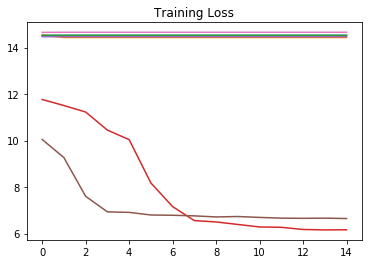

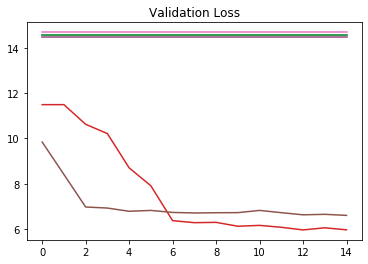

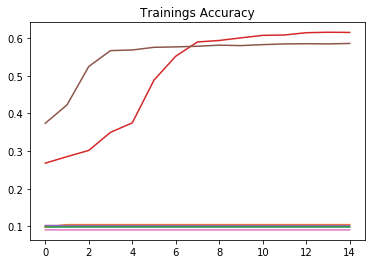

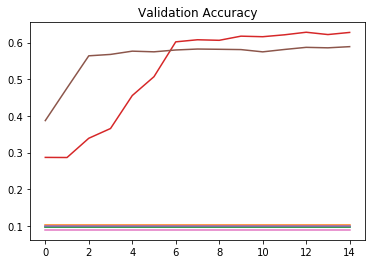

In [79]:

optimizers_to_test = ["rmsprop",'sgd',"adagrad","adadelta","adam","adamax","nadam"]
for optimizer in optimizers_to_test:
    print("optimizers_to_test :" ,optimizer)
    
    model = create_model()
    
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    hist = model.fit(flat_input_train_minus_averaged,y_train_cat,validation_data=\
              (flat_input_test_minus_averaged,y_test_cat),epochs=15)
    plt.figure(999)
    plt.plot(hist.history["loss"])
    plt.title("Training Loss")
    plt.figure(998)
    plt.plot(hist.history["val_loss"])
    plt.title("Validation Loss")

    plt.figure(888)
    plt.plot(hist.history["acc"])
    plt.title("Trainings Accuracy")

    plt.figure(887)
    plt.plot(hist.history["val_acc"])
    plt.title("Validation Accuracy")

    del hist
    del model
    K.clear_session()
    gc.collect()


die Genauigkeit bei 10 Klassen 0.1 ist zufrieden.

Aber bei 2 Klassen die Genauigkeit von 0.5 macht kein Sinn !
die Neuralenetzwerk da kann uberhabt nicht uterschied zwischen die beide Klassen

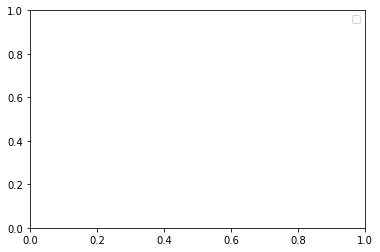

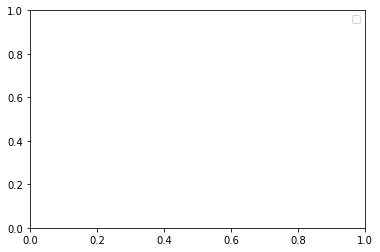

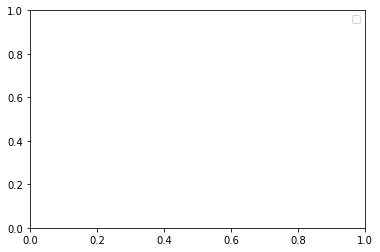

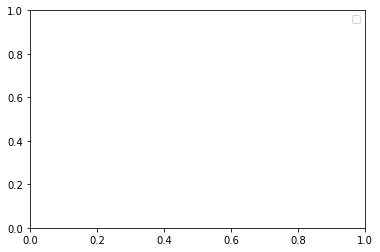

In [80]:
new_legend = optimizers_to_test + [i + " mean" for i in optimizers_to_test]
plt.figure(999)
plt.legend(new_legend)
plt.figure(998)
plt.legend(new_legend)
plt.figure(888)
plt.legend(new_legend)
plt.figure(887)
plt.legend(new_legend)

In [75]:
import os
print( os.getcwd() )
print( os.listdir() )

/content
['.config', 'sgdTrainings_Accuracy.png', 'adamaxValidation_Loss.png', 'nadamTrainings_Accuracy.png', 'gdrive', 'rmspropValidation_Accuracy.png', 'sgdValidation_Accuracy.png', 'adagradValidation_Accuracy.png', 'adagradValidation_Loss.png', 'nadamValidation_Loss.png', 'adadeltaTraining_Loss.png', 'adamValidation_Loss.png', 'sgdTraining_Loss.png', 'rmspropTraining Loss.png', 'rmspropTrainings_Accuracy.png', 'adamaxValidation_Accuracy.png', 'adamaxTrainings_Accuracy.png', 'rmspropTraining_Loss.png', 'adagradTraining_Loss.png', 'nadamValidation_Accuracy.png', 'sgdValidation_Loss.png', 'adamTrainings_Accuracy.png', 'rmspropValidation_Loss.png', 'adamaxTraining_Loss.png', 'adagradTrainings_Accuracy.png', 'adadeltaValidation_Accuracy.png', 'adadeltaTrainings_Accuracy.png', 'Trmsproprrmsproparmspropirmspropnrmspropirmspropnrmspropgrmsprop rmspropLrmspropormspropsrmsprops.png', 'a.png', 'adamTraining_Loss.png', 'adc.json', 'adamValidation_Accuracy.png', 'adadeltaValidation_Loss.png', 'n

In [0]:
from google.colab import files
files.download( "rmspropTraining Loss.png" ) 

In [73]:
    plt.savefig(optimizer+"Training_Loss.png")


<Figure size 432x288 with 0 Axes>